In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
data_dir = "dataset"  # Folder containing 'clean' and 'dirty' subfolders

In [8]:
img_size = (150, 150)  # Resize images to 150x150
batch_size = 32  # Process 32 images at a time

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [11]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification: clean (0) or dirty (1)
    subset='training'
)


Found 492 images belonging to 2 classes.


In [12]:
Val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 122 images belonging to 2 classes.


In [13]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs = 10
history = model.fit(train_generator, validation_data=Val_generator, epochs=epochs)

Epoch 1/10


16/16 [==============================] - 22s 1s/step - loss: 1.3553 - accuracy: 0.5183 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 9s 574ms/step - loss: 0.6752 - accuracy: 0.5650 - val_loss: 0.6193 - val_accuracy: 0.7295
Epoch 3/10
16/16 [==============================] - 9s 561ms/step - loss: 0.5726 - accuracy: 0.6911 - val_loss: 0.5565 - val_accuracy: 0.6557
Epoch 4/10
16/16 [==============================] - 9s 569ms/step - loss: 0.5412 - accuracy: 0.7480 - val_loss: 0.4515 - val_accuracy: 0.8197
Epoch 5/10
16/16 [==============================] - 9s 570ms/step - loss: 0.5021 - accuracy: 0.7480 - val_loss: 0.4677 - val_accuracy: 0.7951
Epoch 6/10
16/16 [==============================] - 9s 569ms/step - loss: 0.4910 - accuracy: 0.7337 - val_loss: 0.5479 - val_accuracy: 0.6885
Epoch 7/10
16/16 [==============================] - 9s 563ms/step - loss: 0.3951 - accuracy: 0.8415 - val_loss: 0.4325 - val_accuracy: 0.7623
Epoch 

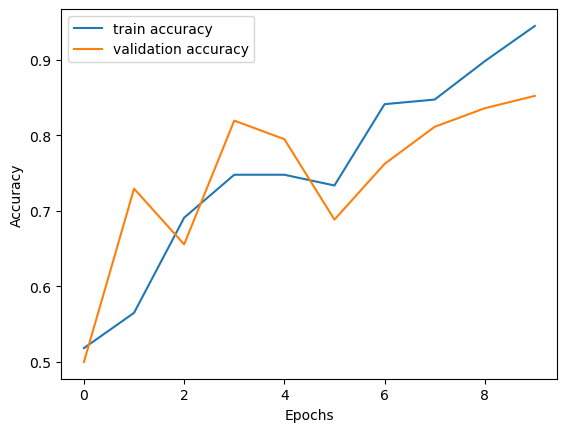

In [18]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
model.save("floor_classifier.h5")

C:\Users\91818\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = keras.models.load_model("floor_classifier.h5")

# Load an image to test
img_path = "C:/Users/91818/Desktop/march_25/dirty_2.jpg"  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make prediction
prediction = model.predict(img_array)

# Interpret the result
if prediction[0][0] > 0.5:
    print("Prediction: Dirty Floor")
else:
    print("Prediction: Clean Floor")

1/1 [==============================] - 0s 190ms/step
Prediction: Dirty Floor
